In [124]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Flatten
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from visual_callback import AccLossPlotter
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop, SGD
from keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [127]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
keras.initializers.he_normal(seed=None)
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#model.add(Dropout(rate=0.5))

model.add(Conv2D(32,(3,3),activation='relu'))
keras.initializers.he_normal(seed=None)
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#model.add(Dropout(rate=0.5))

model.add(Conv2D(64,(3,3),activation='relu'))
keras.initializers.he_normal(seed=None)
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
keras.initializers.he_normal(seed=None)
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(7,activation='sigmoid'))

In [128]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization_40 (Batc (None, 126, 126, 16)      64        
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 124, 124, 16)      2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
batch_normalization_41 (Batc (None, 60, 60, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 58, 58, 32)      

In [129]:
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [130]:
train_data = ImageDataGenerator(rescale=1/255)
val_data = ImageDataGenerator(rescale=1/255)

train_img = train_data.flow_from_directory('train_resize/',
target_size=(128,128),
color_mode='rgb',
batch_size = 128, class_mode='categorical')

val_img = val_data.flow_from_directory('val_resize/',
                                      target_size=(128,128),
                                      color_mode='rgb',  
                                      batch_size = 32,
                                       class_mode = 'categorical')

Found 7762 images belonging to 7 classes.
Found 2197 images belonging to 7 classes.


In [131]:
STEP_SIZE_TRAIN=train_img.n//train_img.batch_size
STEP_SIZE_VALID=val_img.n//val_img.batch_size

In [132]:
filepath='classify.hdf5'
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_lr=0.0001)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
plotter = AccLossPlotter(graphs=['acc', 'loss'], save_graph=True)

Epoch 1/50
60/60 [==============================] - 402s 7s/step - loss: 0.9544 - accuracy: 0.6840 - val_loss: 1.6741 - val_accuracy: 0.6029


/home/xia/miniconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


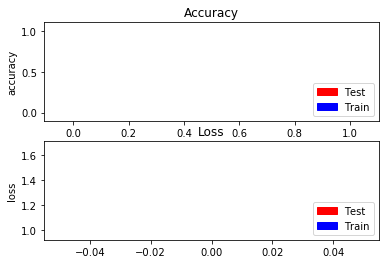

Epoch 2/50
60/60 [==============================] - 409s 7s/step - loss: 0.7792 - accuracy: 0.6907 - val_loss: 1.6247 - val_accuracy: 0.6032


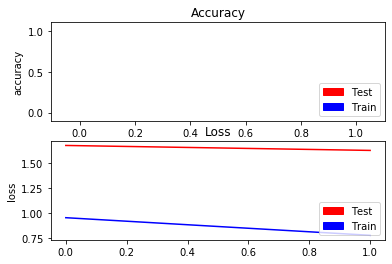

Epoch 3/50
60/60 [==============================] - 410s 7s/step - loss: 0.7412 - accuracy: 0.6920 - val_loss: 1.9711 - val_accuracy: 0.6037


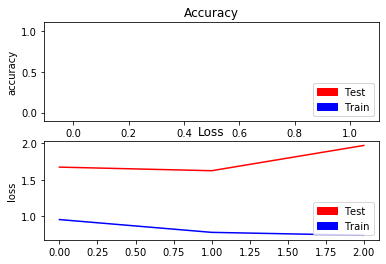

Epoch 4/50
60/60 [==============================] - 408s 7s/step - loss: 0.6972 - accuracy: 0.6920 - val_loss: 2.1005 - val_accuracy: 0.6037


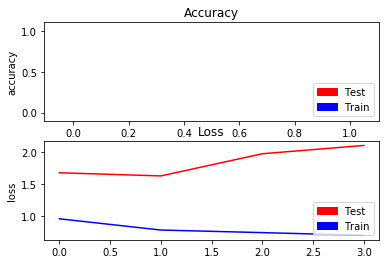

Epoch 5/50
60/60 [==============================] - 407s 7s/step - loss: 0.6759 - accuracy: 0.6935 - val_loss: 2.0011 - val_accuracy: 0.6018


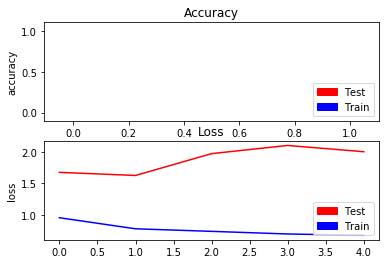

Epoch 6/50
60/60 [==============================] - 406s 7s/step - loss: 0.6615 - accuracy: 0.6903 - val_loss: 1.5956 - val_accuracy: 0.6074


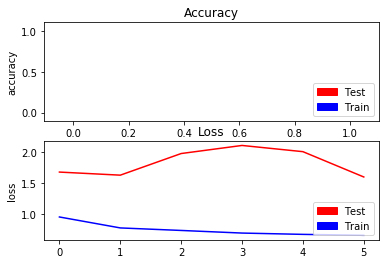

Epoch 7/50
47/60 [======================>.......] - ETA: 2:25:39 - loss: 0.6414 - accuracy: 0.6953

KeyboardInterrupt: 

In [133]:
history = model.fit_generator(
train_img,
steps_per_epoch=STEP_SIZE_TRAIN,
epochs=50,
verbose=1,
validation_data = val_img,
validation_steps=STEP_SIZE_VALID,
shuffle=True,
callbacks=[reduce_lr, checkpoint, plotter])

In [116]:
model.evaluate_generator(generator=val_img,
steps=STEP_SIZE_VALID)

[1.379753589630127, 0.6029411554336548]

In [117]:
model = load_model("classify.hdf5")
print(model)

In [118]:
y=model.load_weights('classify.hdf5')
print(y)

None


In [88]:
model.evaluate_generator(generator=val_img,
steps=STEP_SIZE_VALID)

[4.549384117126465, 0.1796875]

In [134]:
from keras.preprocessing import image
import numpy as np
path = 'test/vas/ISIC_0029448.jpg'
img = image.load_img(path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])

[0. 0. 0. 0. 1. 1. 0.]
